In [1]:
#Import demnading lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset as dataframe
df = pd.read_csv('cervical_cancer.csv')

In [3]:
#A brief overview
df.head(15)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
df.shape

(858, 36)

In [6]:
# Replace all occurrences of '?' with NaN values
df.replace('?', np.nan, inplace=True)

In [7]:
#Removing some columns cause 71 non-null is only the 8%.
df.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1, inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
Dx:Cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx:CIN,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
Dx:HPV,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0
Hinselmann,858.0,0.040793,0.197925,0.0,0.0,0.0,0.0,1.0
Schiller,858.0,0.086247,0.280892,0.0,0.0,0.0,0.0,1.0
Citology,858.0,0.051282,0.220701,0.0,0.0,0.0,0.0,1.0
Biopsy,858.0,0.064103,0.245078,0.0,0.0,0.0,0.0,1.0


In [9]:
# Convert all objects to float data type
df = df.astype(float)

In [10]:
#Replace all NaN values with the mean value for each feature
df.fillna(df.mean(), inplace=True)

In [11]:
#Convert all floats to int data type
df = df.astype(int)

In [12]:
#Choosing a subset 
df1=df[['Age','Number of sexual partners','First sexual intercourse',
     'Num of pregnancies','Smokes','Hormonal Contraceptives (years)',
      'IUD','STDs:HPV','Biopsy']]

In [13]:
#Correlation
cor=df1.corr()
cor

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives (years),IUD,STDs:HPV,Biopsy
Age,1.000000,0.085971,0.367400,0.525892,0.057204,0.279825,0.279429,0.040861,0.055956
Number of sexual partners,0.085971,1.000000,-0.146640,0.077439,0.236858,0.020453,0.032460,0.014360,-0.000408
First sexual intercourse,0.367400,-0.146640,1.000000,-0.054913,-0.123212,0.012093,-0.009796,0.034851,0.008020
Num of pregnancies,0.525892,0.077439,-0.054913,1.000000,0.081517,0.209686,0.204501,-0.026153,0.040215
Smokes,0.057204,0.236858,-0.123212,0.081517,1.000000,0.046794,-0.055115,0.049193,0.028724
Hormonal Contraceptives (years),0.279825,0.020453,0.012093,0.209686,0.046794,1.000000,0.093837,0.052261,0.077805
IUD,0.279429,0.032460,-0.009796,0.204501,-0.055115,0.093837,1.000000,-0.015819,0.059231
STDs:HPV,0.040861,0.014360,0.034851,-0.026153,0.049193,0.052261,-0.015819,1.000000,-0.012650
Biopsy,0.055956,-0.000408,0.008020,0.040215,0.028724,0.077805,0.059231,-0.012650,1.000000


<AxesSubplot:>

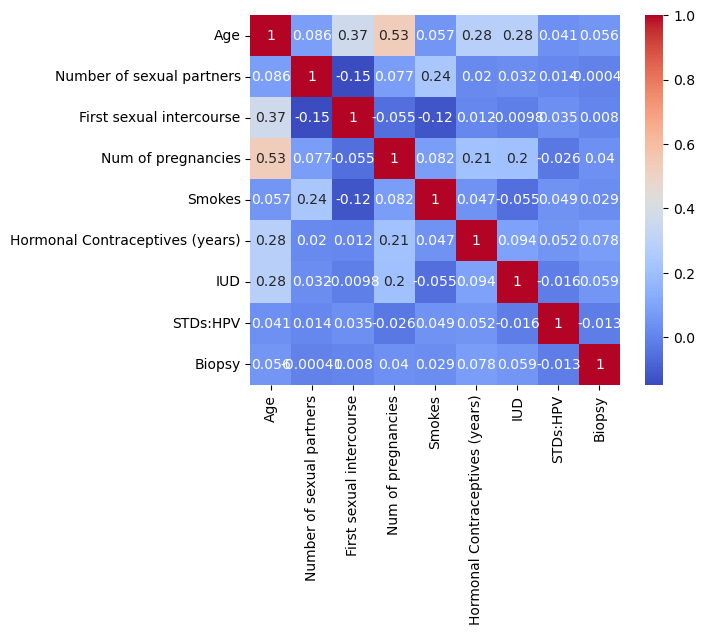

In [14]:
#heatmap
sns.heatmap(cor, cmap='coolwarm', annot=True, square=True)

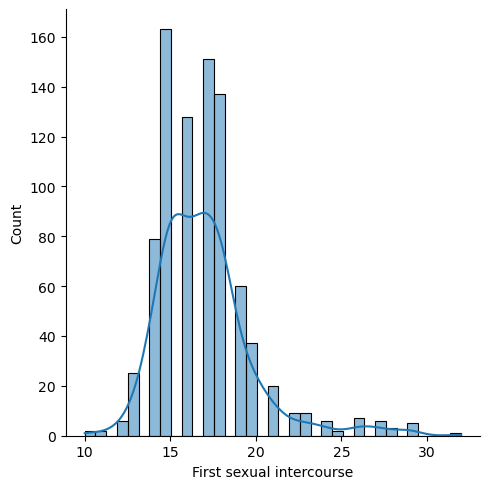

In [15]:
#Histogram
sns.displot(df['First sexual intercourse'], kde=True)

In [16]:
#Converting some features from int to objects
cols_convert =['Smokes','Hormonal Contraceptives','IUD','STDs','Dx:HPV','Dx:Cancer']
df[cols_convert] = df[cols_convert].astype(object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int32 
 1   Number of sexual partners           858 non-null    int32 
 2   First sexual intercourse            858 non-null    int32 
 3   Num of pregnancies                  858 non-null    int32 
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    int32 
 6   Smokes (packs/year)                 858 non-null    int32 
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    int32 
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    int32 
 11  STDs                                858 non-null    object

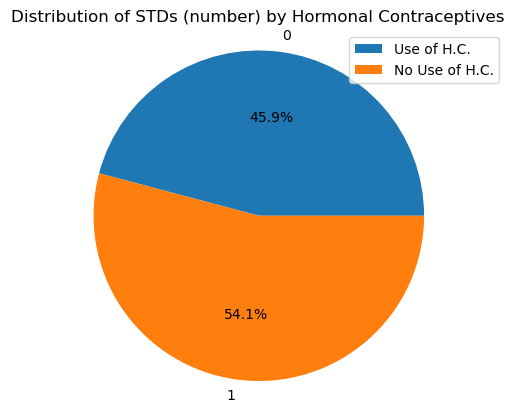

In [18]:
grouped = df.groupby('Hormonal Contraceptives')['STDs (number)'].sum()
# Create a pie chart
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Distribution of STDs (number) by Hormonal Contraceptives')
new_labels = ['Use of H.C.','No Use of H.C.']
plt.legend(new_labels, loc='best')
plt.axis('equal')
plt.show()

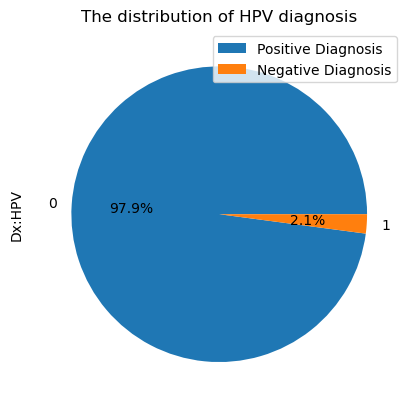

In [19]:
#pie chart
counts_HPV = df['Dx:HPV'].value_counts()
counts_HPV.plot.pie(autopct='%.1f%%')
new_labels = ['Positive Diagnosis','Negative Diagnosis']
plt.legend(new_labels, loc='best')
plt.title('The distribution of HPV diagnosis')
plt.show()

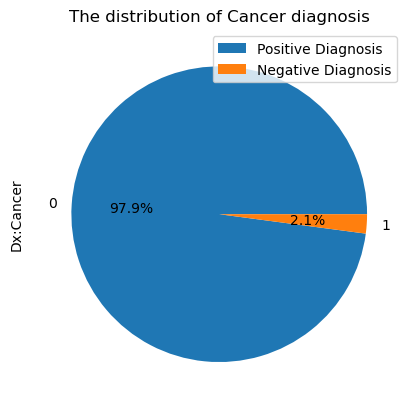

In [20]:
#pie chart
counts_HPV = df['Dx:Cancer'].value_counts()
counts_HPV.plot.pie(autopct='%.1f%%')
new_labels = ['Positive Diagnosis','Negative Diagnosis']
plt.legend(new_labels, loc='best')
plt.title('The distribution of Cancer diagnosis')
plt.show()

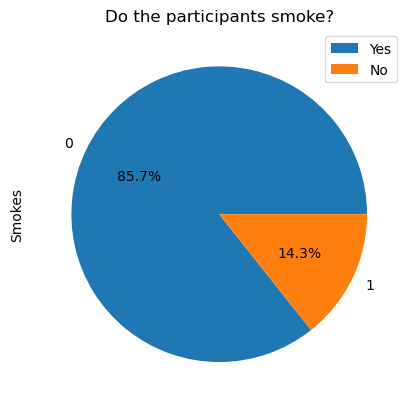

In [21]:
#pie chart
counts_experience = df['Smokes'].value_counts()
counts_experience.plot.pie(autopct='%.1f%%')
new_labels = ['Yes','No']
plt.legend(new_labels, loc='best')
plt.title('Do the participants smoke?')
plt.show()

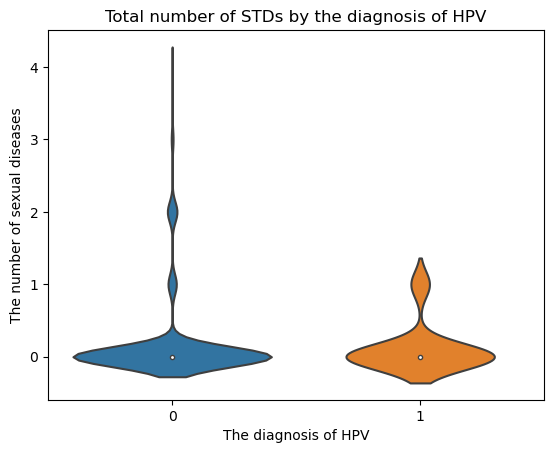

In [22]:
#Violin plot
sns.violinplot(x='Dx:HPV', y='STDs (number)', data=df)
plt.xlabel('The diagnosis of HPV')
plt.ylabel('The number of sexual diseases')
plt.title('Total number of STDs by the diagnosis of HPV')
plt.show()

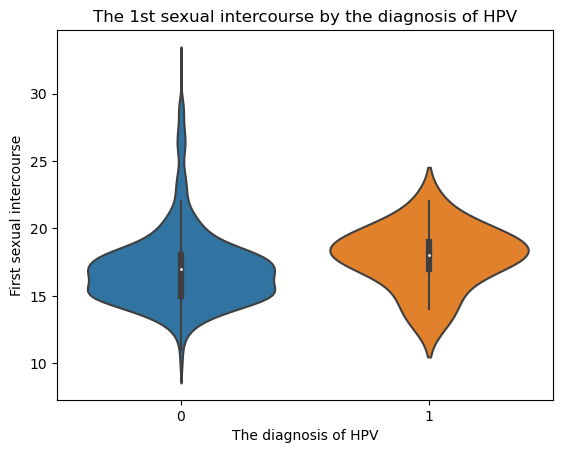

In [23]:
sns.violinplot(x='Dx:HPV', y='First sexual intercourse', data=df)
plt.xlabel('The diagnosis of HPV')
plt.ylabel('First sexual intercourse')
plt.title('The 1st sexual intercourse by the diagnosis of HPV')
plt.show()

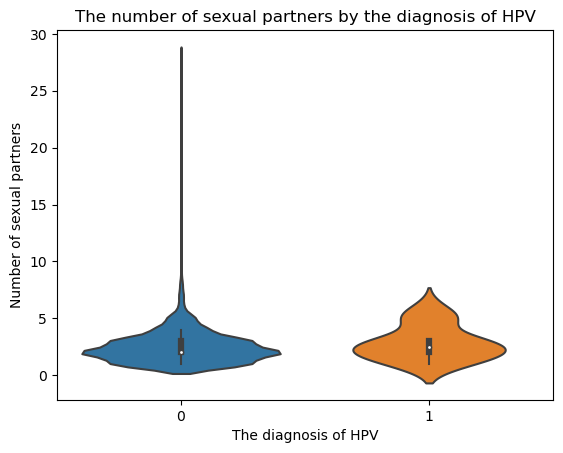

In [24]:
sns.violinplot(x='Dx:HPV', y='Number of sexual partners', data=df)
plt.xlabel('The diagnosis of HPV')
plt.ylabel('Number of sexual partners')
plt.title('The number of sexual partners by the diagnosis of HPV')
plt.show()

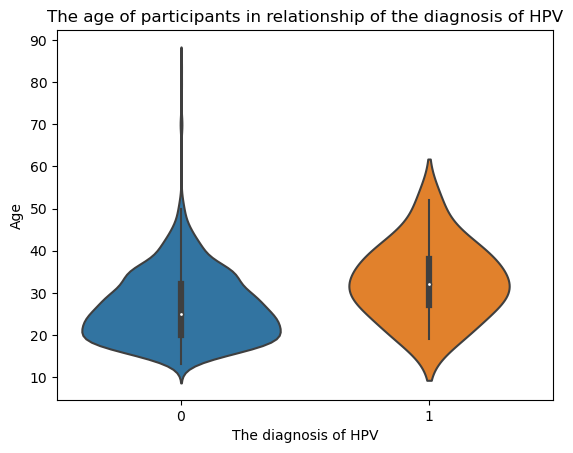

In [25]:
sns.violinplot(x='Dx:HPV', y='Age', data=df)
plt.xlabel('The diagnosis of HPV')
plt.ylabel('Age')
plt.title('The age of participants in relationship of the diagnosis of HPV')
plt.show()

In [26]:
#Choose a subset of the basic dataframe
data = df[['Age','First sexual intercourse','Number of sexual partners',
           'STDs (number)','Hormonal Contraceptives (years)','Dx:HPV']]

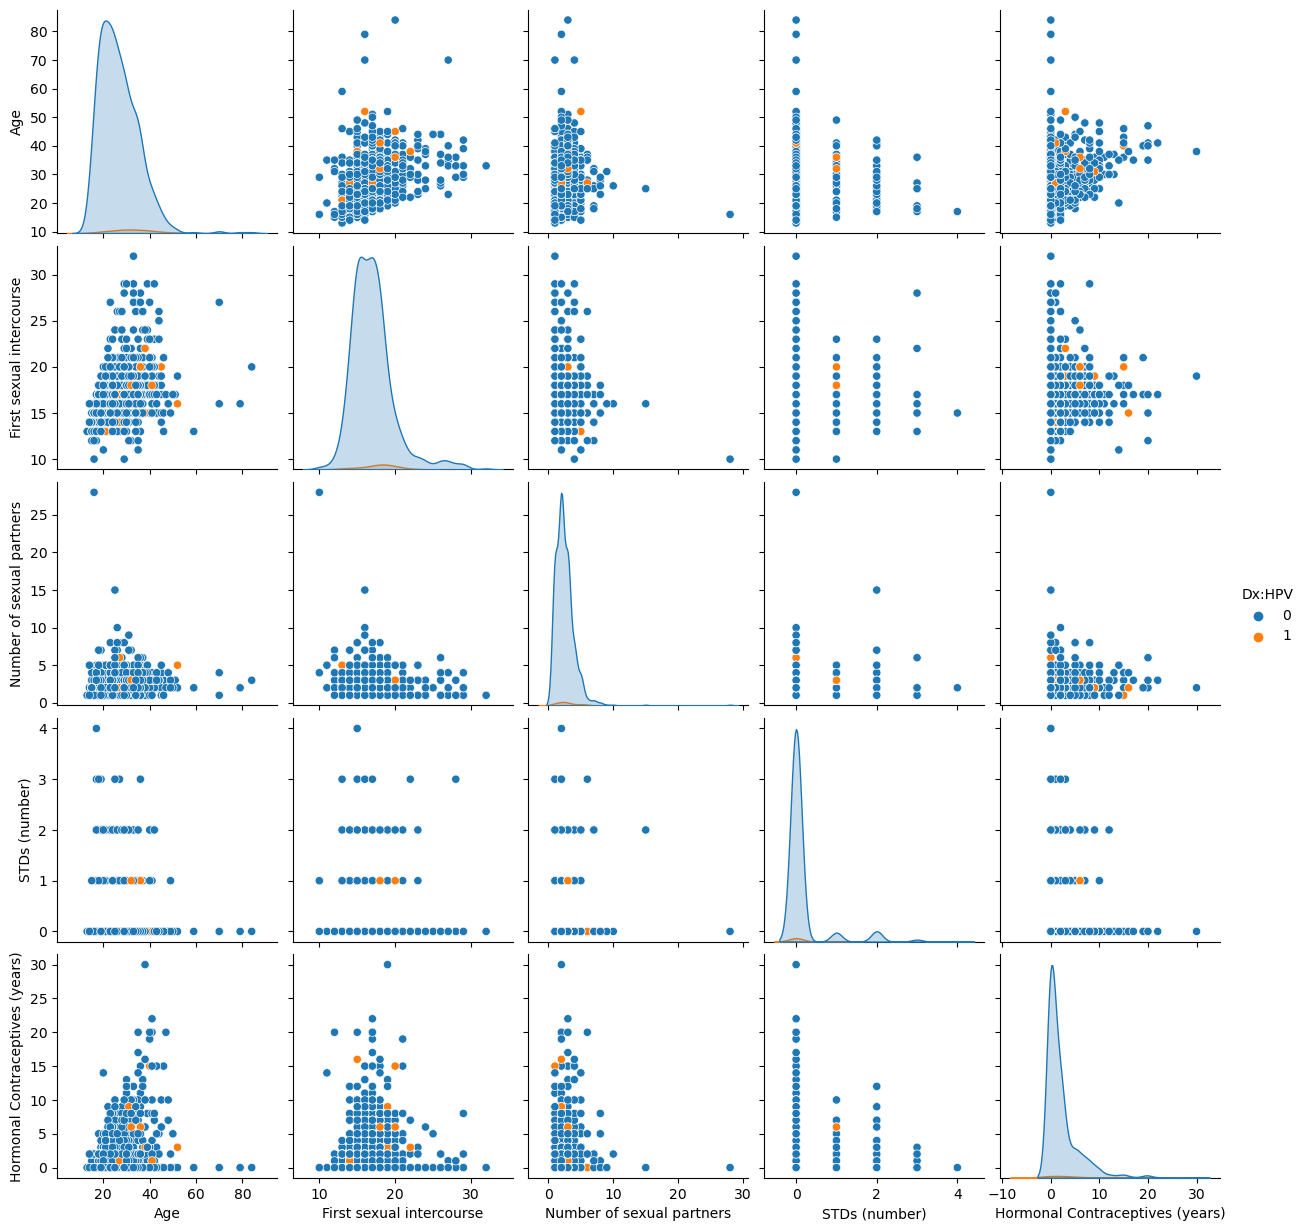

In [27]:
#pairplot
sns.pairplot(data, hue='Dx:HPV')

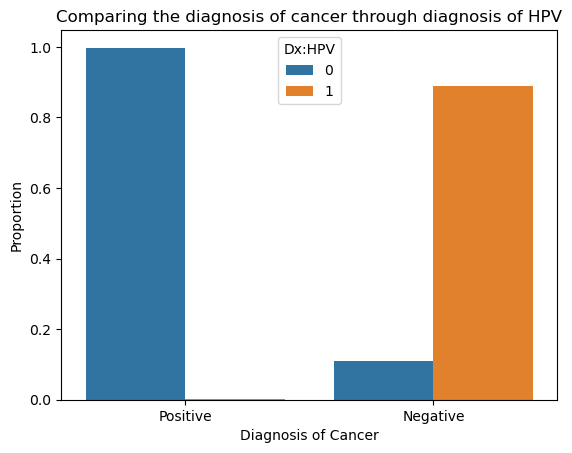

In [28]:
#Barplot
df3 = df.groupby(['Dx:Cancer', 'Dx:HPV']).size().reset_index(name='counts')
df3['total'] = df3.groupby(['Dx:Cancer'])['counts'].transform('sum')
df3['proportion'] = df3['counts'] / df3['total']

#Replace categories in Dx:Cancer column
df3['Dx:Cancer'] = df3['Dx:Cancer'].replace({0: 'Positive', 1: 'Negative'})

sns.barplot(x='Dx:Cancer', y='proportion', hue='Dx:HPV', data=df3)
plt.xlabel('Diagnosis of Cancer')
plt.ylabel('Proportion')
plt.title('Comparing the diagnosis of cancer through diagnosis of HPV')
plt.show()

In [29]:
df3.columns

Index(['Dx:Cancer', 'Dx:HPV', 'counts', 'total', 'proportion'], dtype='object')

In [30]:
df3.head()

,Dx:Cancer,Dx:HPV,counts,total,proportion
0,Positive,0,838,840,0.997619
1,Positive,1,2,840,0.002381
2,Negative,0,2,18,0.111111
3,Negative,1,16,18,0.888889


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int32 
 1   Number of sexual partners           858 non-null    int32 
 2   First sexual intercourse            858 non-null    int32 
 3   Num of pregnancies                  858 non-null    int32 
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    int32 
 6   Smokes (packs/year)                 858 non-null    int32 
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    int32 
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    int32 
 11  STDs                                858 non-null    object

In [52]:
#Converting the target from obj to int
target=['Dx:HPV']
df[target] = df[target].astype(int)

In [54]:
#Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [55]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Dx:HPV', axis=1),
                                                    df['Dx:HPV'], test_size=0.2, random_state=31)

In [56]:
#Encode the target variable as numeric values
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [67]:
#Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=23)

In [68]:
#Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=23)

In [72]:
# make predictions on the training and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [74]:
# calculate the training and test set accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Training set accuracy:', train_accuracy)
print('Test set accuracy:', test_accuracy)

Training set accuracy: 1.0
Test set accuracy: 0.9941860465116279


In [77]:
#Metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9941860465116279
Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


In [75]:
#Calculate the feature importances
importances = rf.feature_importances_
print('Feature importances:', importances)

Feature importances: [4.57185703e-02 3.99433042e-02 5.62947775e-02 3.04474388e-02
 1.39349512e-02 3.07123508e-02 2.44823459e-02 1.02336996e-02
 5.55156794e-02 1.38298553e-02 2.27158047e-02 2.25882888e-03
 2.69194170e-03 4.73567187e-04 0.00000000e+00 0.00000000e+00
 3.50182148e-05 7.56276884e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.37087209e-05 0.00000000e+00
 3.39857236e-02 2.18445284e-03 3.87930716e-01 1.34600424e-02
 1.51552006e-01 1.69857230e-02 1.41997722e-02 1.27460815e-02
 1.68773639e-02]


In [81]:
#Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix:', cm)

Confusion matrix: [[167   0]
 [  1   4]]


In [82]:
#Perform cross-validation and print the mean and standard deviation of the scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.97826087 0.99270073 0.99270073 0.98540146 1.        ]
Mean score: 0.9898127578546493
Standard deviation: 0.007394137421110949
